In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline


In [2]:
data=pd.read_excel('C:\\Users\\TUKAI\\Desktop\\data.xlsx')

In [3]:
data.head(10)

,Image_Name,Blue_Pixel(%),Brown_Pixel(%),Yellow_Pixel(%),Brown+Yellow_Pixel(%),Class
0,001_C_NUE_R2-10-06-2019 21_15_41-1002.jpg,14.353814,1.022339,69.161154,70.183493,0
1,001_C_NUE_R2-13-06-2019 19_53_38-1002.jpg,7.451407,5.698603,71.593169,77.291772,0
2,001_C_NUE_R2-19-06-2019 15_54_40-1002.jpg,12.896832,3.151531,65.158072,68.309603,0
3,003_C_NUE_R1-13-06-2019 20_31_27-1013.jpg,1.872212,16.231225,66.905197,83.136422,0
4,003_C_NUE_R2-13-06-2019 20_26_15-1014.jpg,1.790615,9.547716,72.574023,82.121740,0
5,003_N_NUE_R3-05-06-2019 17_02_25-1018.jpg,50.422508,1.276109,31.767287,33.043395,0
6,005_N_NUE_R3-13-06-2019 19_57_43-1030.jpg,5.171429,2.330134,72.003045,74.333179,0
7,005_N_NUE_R3-19-06-2019 15_58_27-1030.jpg,16.620636,4.737625,62.852489,67.590114,0
8,008_N_NUE_R2-05-06-2019 16_57_30-1047.jpg,4.317117,2.809009,75.992793,78.801802,0
9,008_N_NUE_R3-05-06-2019 16_55_48-1048.jpg,7.349863,2.128115,73.516965,75.645080,0


In [4]:
data['Class'].value_counts()

0    186
2    110
1     38
3     21
Name: Class, dtype: int64

In [43]:
data1 = data.copy()


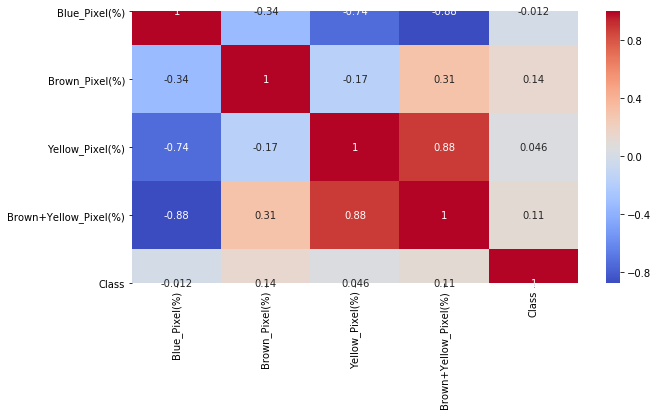

In [44]:
import seaborn as sns
plt.figure(figsize=(10,5))
sns.heatmap(data1.corr(),cmap= 'coolwarm',annot = True)
plt.show()

In [45]:
data1.skew()

Blue_Pixel(%)            1.972511
Brown_Pixel(%)           2.825881
Yellow_Pixel(%)         -1.445917
Brown+Yellow_Pixel(%)   -1.837216
Class                    0.518954
dtype: float64

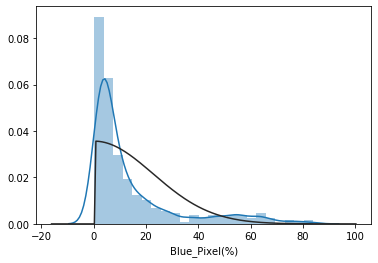

<Figure size 432x288 with 0 Axes>

In [46]:
from scipy.stats import skewnorm
sns.distplot(data1['Blue_Pixel(%)'], fit=skewnorm);
fig=plt.figure()

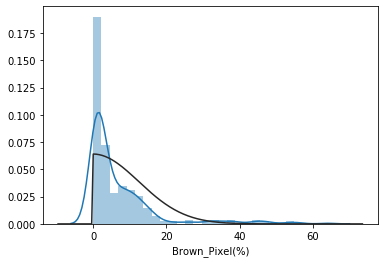

<Figure size 432x288 with 0 Axes>

In [47]:
from scipy.stats import skewnorm
sns.distplot(data1['Brown_Pixel(%)'], fit=skewnorm);
fig=plt.figure()

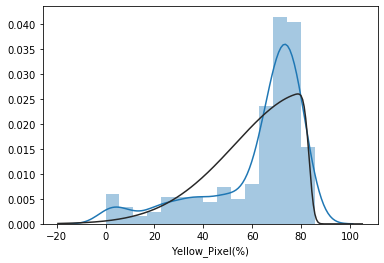

<Figure size 432x288 with 0 Axes>

In [48]:
from scipy.stats import skewnorm
sns.distplot(data1['Yellow_Pixel(%)'], fit=skewnorm);
fig=plt.figure()

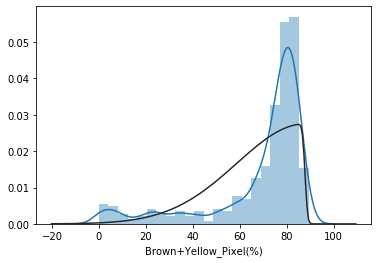

<Figure size 432x288 with 0 Axes>

In [49]:
from scipy.stats import skewnorm
sns.distplot(data1['Brown+Yellow_Pixel(%)'], fit=skewnorm);
fig=plt.figure()

In [50]:
a = np.log(data1['Brown+Yellow_Pixel(%)'])
a.skew()

nan

In [51]:
b =np.sqrt(data1['Brown+Yellow_Pixel(%)'])
b.skew()

-2.4994613687877827

In [52]:
from scipy import stats
c = stats.boxcox(data1['Brown+Yellow_Pixel(%)'])[0]
pd.Series(c).skew()

ValueError: Data must be positive.

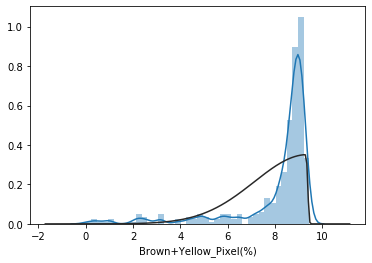

<Figure size 432x288 with 0 Axes>

In [53]:
from scipy.stats import skewnorm
sns.distplot(b, fit=skewnorm);
fig=plt.figure()

In [54]:
data1['Blue_Pixel(%)'] = np.log(data1['Blue_Pixel(%)'])
data1['Blue_Pixel(%)'].skew()

0.16806716856485188

In [55]:
data1['Brown_Pixel(%)'] = np.sqrt(data1['Brown_Pixel(%)'])
data1['Brown_Pixel(%)'].skew()

1.252592192602049

In [56]:
data1.skew()

Blue_Pixel(%)            0.168067
Brown_Pixel(%)           1.252592
Yellow_Pixel(%)         -1.445917
Brown+Yellow_Pixel(%)   -1.837216
Class                    0.518954
dtype: float64

# After Removing Skewness

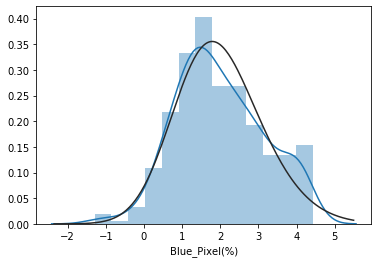

<Figure size 432x288 with 0 Axes>

In [57]:
from scipy.stats import skewnorm
sns.distplot(data1['Blue_Pixel(%)'], fit=skewnorm);
fig=plt.figure()

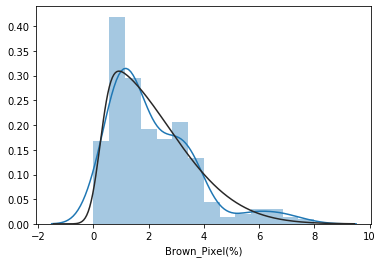

<Figure size 432x288 with 0 Axes>

In [59]:
from scipy.stats import skewnorm
sns.distplot(data1['Brown_Pixel(%)'], fit=skewnorm);
fig=plt.figure()

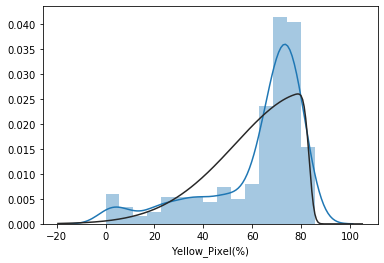

<Figure size 432x288 with 0 Axes>

In [60]:
from scipy.stats import skewnorm
sns.distplot(data1['Yellow_Pixel(%)'], fit=skewnorm);
fig=plt.figure()

In [62]:
data1= data1.drop('Brown+Yellow_Pixel(%)',axis = 1)

In [63]:
data1= data1.drop('Image_Name',axis = 1)

In [64]:
data1.columns

Index(['Blue_Pixel(%)', 'Brown_Pixel(%)', 'Yellow_Pixel(%)', 'Class'], dtype='object')

In [65]:
data1.skew()

Blue_Pixel(%)      0.168067
Brown_Pixel(%)     1.252592
Yellow_Pixel(%)   -1.445917
Class              0.518954
dtype: float64

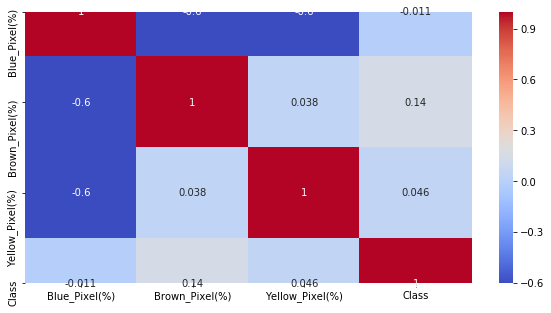

In [71]:
import seaborn as sns
plt.figure(figsize=(10,5))
sns.heatmap(data1.corr(),cmap= 'coolwarm',annot = True)
plt.show()

In [73]:
X = data1.drop('Class',axis = 1)
y = data1['Class']

In [74]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=10, shuffle=True, random_state=123)

In [103]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=200)

In [104]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn, X, y, cv=kfold)

In [105]:
scores

array([0.58333333, 0.41666667, 0.52777778, 0.58333333, 0.52777778,
       0.42857143, 0.42857143, 0.54285714, 0.6       , 0.6       ])

In [106]:
print("Accuracy: %0.4f" % scores.mean())

Accuracy: 0.5239


In [215]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=20, 
                               bootstrap = True,
                               max_features = 'sqrt')


In [216]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=kfold)

In [217]:
scores

array([0.41666667, 0.5       , 0.52777778, 0.61111111, 0.5       ,
       0.42857143, 0.51428571, 0.45714286, 0.51428571, 0.57142857])

In [218]:
print("Accuracy: %0.4f" % scores.mean())

Accuracy: 0.5041


In [233]:
from sklearn.svm import SVC
classifier= SVC(kernel ='linear', random_state = 1) 


In [234]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(classifier, X, y, cv=kfold)

In [235]:
scores

array([0.58333333, 0.41666667, 0.52777778, 0.58333333, 0.52777778,
       0.42857143, 0.42857143, 0.54285714, 0.6       , 0.6       ])

In [236]:
print("Accuracy: %0.4f" % scores.mean())

Accuracy: 0.5239


In [264]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()

In [265]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X, y, cv=kfold)

In [266]:
scores

array([0.47222222, 0.38888889, 0.41666667, 0.47222222, 0.5       ,
       0.4       , 0.31428571, 0.31428571, 0.45714286, 0.45714286])

In [267]:
print("Accuracy: %0.4f" % scores.mean())

Accuracy: 0.4193


In [280]:
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB()

In [281]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(gnb, X, y, cv=kfold)

In [282]:
scores

array([0.52777778, 0.44444444, 0.55555556, 0.5       , 0.47222222,
       0.42857143, 0.48571429, 0.62857143, 0.57142857, 0.57142857])

In [283]:
print("Accuracy: %0.4f" % scores.mean())

Accuracy: 0.5186


In [285]:
data2 = data.copy()

In [286]:
data2= data2.drop('Image_Name',axis = 1)

In [287]:
X = data2.drop('Class',axis = 1)
y = data2['Class']

In [305]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=200)

In [306]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn, X, y, cv=kfold)

In [307]:
scores

array([0.58333333, 0.41666667, 0.52777778, 0.58333333, 0.52777778,
       0.42857143, 0.42857143, 0.54285714, 0.6       , 0.6       ])

In [308]:
print("Accuracy: %0.4f" % scores.mean())

Accuracy: 0.5239


In [346]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=200, 
                               bootstrap = True,
                               max_features = 'sqrt')

In [374]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=kfold)

In [375]:
scores

array([0.58333333, 0.5       , 0.52777778, 0.63888889, 0.55555556,
       0.45714286, 0.42857143, 0.48571429, 0.45714286, 0.57142857])

In [376]:
print("Accuracy: %0.4f" % scores.mean())

Accuracy: 0.5206


In [396]:
from sklearn.svm import SVC
classifier= SVC(kernel ='rbf', random_state = 1) 

In [397]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(classifier, X, y, cv=kfold)

C:\Users\TUKAI\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\TUKAI\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\TUKAI\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\TUKAI\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarni

In [398]:
scores

array([0.58333333, 0.44444444, 0.5       , 0.55555556, 0.52777778,
       0.45714286, 0.51428571, 0.42857143, 0.6       , 0.57142857])

In [399]:
print("Accuracy: %0.4f" % scores.mean())

Accuracy: 0.5183


In [400]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()

In [422]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X, y, cv=kfold)

In [423]:
scores

array([0.47222222, 0.36111111, 0.41666667, 0.52777778, 0.41666667,
       0.42857143, 0.34285714, 0.45714286, 0.45714286, 0.57142857])

In [424]:
print("Accuracy: %0.4f" % scores.mean())

Accuracy: 0.4452


In [425]:
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB()

In [432]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(gnb, X, y, cv=kfold)

In [433]:
scores

array([0.44444444, 0.41666667, 0.36111111, 0.55555556, 0.52777778,
       0.37142857, 0.42857143, 0.42857143, 0.48571429, 0.57142857])

In [434]:
print("Accuracy: %0.4f" % scores.mean())

Accuracy: 0.4591


In [435]:
data3 = data.copy()

In [436]:
data3= data3.drop('Image_Name',axis = 1)

In [437]:
X = data3.drop('Class',axis = 1)
y = data3['Class']

In [438]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
scalar.fit(X)
X = scalar.transform(X)


In [455]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=200)

In [456]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn, X, y, cv=kfold)

In [457]:
scores

array([0.58333333, 0.41666667, 0.52777778, 0.58333333, 0.52777778,
       0.42857143, 0.42857143, 0.54285714, 0.6       , 0.6       ])

In [458]:
print("Accuracy: %0.4f" % scores.mean())

Accuracy: 0.5239


In [499]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=200, 
                               bootstrap = True,
                               max_features = 'sqrt')

In [512]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=kfold)

In [513]:
scores

array([0.58333333, 0.5       , 0.52777778, 0.61111111, 0.52777778,
       0.45714286, 0.42857143, 0.42857143, 0.51428571, 0.54285714])

In [514]:
print("Accuracy: %0.4f" % scores.mean())

Accuracy: 0.5121


In [526]:
from sklearn.svm import SVC
classifier= SVC(kernel ='rbf', random_state = 1) 

In [527]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(classifier, X, y, cv=kfold)

C:\Users\TUKAI\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\TUKAI\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\TUKAI\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\TUKAI\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarni

In [528]:
scores

array([0.55555556, 0.41666667, 0.58333333, 0.61111111, 0.52777778,
       0.45714286, 0.45714286, 0.6       , 0.62857143, 0.6       ])

In [529]:
print("Accuracy: %0.4f" % scores.mean())

Accuracy: 0.5437


In [549]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()

In [553]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X, y, cv=kfold)

In [554]:
scores

array([0.47222222, 0.41666667, 0.44444444, 0.55555556, 0.38888889,
       0.45714286, 0.34285714, 0.45714286, 0.45714286, 0.51428571])

In [555]:
print("Accuracy: %0.4f" % scores.mean())

Accuracy: 0.4506


In [556]:
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB()

In [560]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(gnb, X, y, cv=kfold)

In [561]:
scores

array([0.44444444, 0.41666667, 0.36111111, 0.55555556, 0.52777778,
       0.37142857, 0.42857143, 0.42857143, 0.48571429, 0.57142857])

In [562]:
print("Accuracy: %0.4f" % scores.mean())

Accuracy: 0.4591


In [589]:
data4 = data.copy()

In [590]:
data4= data4.drop('Image_Name',axis = 1)

In [591]:
X = data4.drop('Class',axis = 1)
y = data4['Class']

In [592]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
scalar.fit(X)
X = scalar.transform(X)


In [802]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
X = pca.transform(X)

In [803]:
pca.explained_variance_ratio_

array([0.70672447])

Text(0, 0.5, 'Cumulative explained variance')

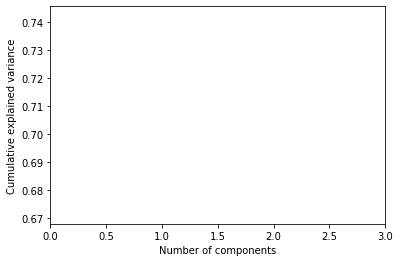

In [805]:
import matplotlib.pyplot as plt
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,3,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In [806]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=200)

In [807]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn, X, y, cv=kfold)

In [808]:
scores

array([0.58333333, 0.41666667, 0.52777778, 0.58333333, 0.52777778,
       0.42857143, 0.42857143, 0.54285714, 0.6       , 0.6       ])

In [809]:
print("Accuracy: %0.4f" % scores.mean())

Accuracy: 0.5239


In [810]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=200, 
                               bootstrap = True,
                               max_features = 'sqrt')

In [811]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=kfold)

In [812]:
scores

array([0.55555556, 0.41666667, 0.41666667, 0.44444444, 0.33333333,
       0.42857143, 0.31428571, 0.28571429, 0.42857143, 0.48571429])

In [813]:
print("Accuracy: %0.4f" % scores.mean())

Accuracy: 0.4110


In [814]:
from sklearn.svm import SVC
classifier= SVC(kernel ='rbf', random_state = 1) 

In [815]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(classifier, X, y, cv=kfold)

C:\Users\TUKAI\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\TUKAI\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\TUKAI\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\TUKAI\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarni

In [816]:
scores

array([0.58333333, 0.41666667, 0.52777778, 0.58333333, 0.52777778,
       0.42857143, 0.42857143, 0.54285714, 0.6       , 0.6       ])

In [817]:
print("Accuracy: %0.4f" % scores.mean())

Accuracy: 0.5239


In [761]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()

In [792]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X, y, cv=kfold)

In [793]:
scores

array([0.47222222, 0.41666667, 0.33333333, 0.44444444, 0.52777778,
       0.48571429, 0.42857143, 0.62857143, 0.57142857, 0.51428571])

In [794]:
print("Accuracy: %0.4f" % scores.mean())

Accuracy: 0.4823


In [795]:
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB()

In [799]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(gnb, X, y, cv=kfold)

In [800]:
scores

array([0.5       , 0.41666667, 0.58333333, 0.58333333, 0.5       ,
       0.42857143, 0.42857143, 0.62857143, 0.6       , 0.57142857])

In [801]:
print("Accuracy: %0.4f" % scores.mean())

Accuracy: 0.5240
